# Superconductivity

### Abstract:
Here is the abstract

### Introduction and theoretical overview:
Here is the stuff

### Experimental Setup and Procedures:
Sick pics go here.

### Experimental Data and Error Analysis:
Cute plots, good math.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from numpy import linspace,exp
from scipy.interpolate import UnivariateSpline, interp1d
% matplotlib inline

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

colors = [np.array([141,211,199])/255., np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

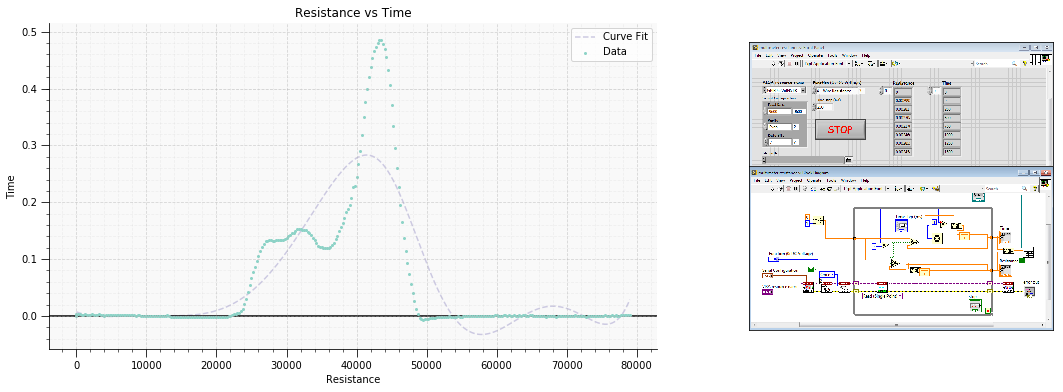

In [48]:
labview = plt.imread('superconductor_snip.PNG')
data = np.loadtxt('superconductor_run1.txt')
time = data[:,0]
resistance = data[:,1]

s = UnivariateSpline(time, resistance, k=5, s=1)
xs = linspace(min(time), max(time), 10000)
ys = s(xs)

height_ratios = [6]
width_ratios = [12,6]
wspace = 0
hspace = 0

fig = plt.figure(figsize=(sum(width_ratios) + wspace * (len(width_ratios) - 1),
                          sum(height_ratios) + hspace * (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios)
fig.suptitle('', fontsize=20)


ax = fig.add_subplot(gs[0, 0])
ax.scatter(time,resistance, s=4, c=colors[0], label='Data')
plt.plot(xs, ys, '--', c=colors[1], alpha = .75, zorder=0, label='Curve Fit')
ax.axhline(0, color='black', zorder=0)
ax.update({'title': 'Resistance vs Time',
            'xlabel': 'Resistance',
            'ylabel': 'Time'})
beautification()

ax = fig.add_subplot(gs[0, 1])
ax.imshow(labview)
minimalization()

### Discussion and Conclusion:
Jesus Christ what dou even do$^{[1]}$

### References:
[1] Richard Feynman